In [ ]:
import requests
from lxml import etree
url="https://movie.douban.com/tag/#/?sort=U&range=0,10&tags=%E7%94%B5%E5%BD%B1"
headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"
}
response = requests.get(url,headers=headers)
content = response.content.decode('utf-8')

html = etree.HTML(content)
print(content)


<!DOCTYPE html>
<html lang="zh-CN" class="ua-windows ua-ff88">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <title>
    ÈÄâÂΩ±ËßÜ
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
    <link rel="apple-touch-icon" href="https://img3.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">
    <link href="https://img3.doubanio.com/f/shire/6522c42d2aba9757aeefa0c35cc0cefc9229747c/css/douban.css" rel="stylesheet" type="text/css">
    <link href="https://img3.doubanio.com/f/shire/db02bd3a4c78de56425ddeedd748a6804af60ee9/css/separation/_all.css" rel="stylesheet" type="text/c

In [ ]:
import random
from time import sleep
import requests
from lxml import etree
from fake_useragent import UserAgent
from requests.packages import urllib3
import re

# ÊîπÂÜôÊó•ÂøóÁ≠âÁ∫ß
urllib3.disable_warnings() #Â±èËîΩÁΩëÈ°µËØÅ‰π¶Ë≠¶Âëä
"""ÁâáÂêç Âú∞Âå∫ ËØÑÂàÜ ‰∏äÊò†Êó∂Èó¥"""
mov_name = ''
country = ''
score = ''
time_detail = ''

# Â≠òÂÇ®Êï∞ÊçÆÁöÑurls
mov_urls = {}


# ‰∏ÄÊ¨°Áà¨Âèñ300Êù°Êï∞ÊçÆ
def get_page(ti, page):
    # ÊûÑÂª∫url
    url = f'https://movie.douban.com/j/search_subjects?type=movie&tag={ti}&sort=rank&page_limit=200&page_start={page * 200} '
    # ÊûÑÂª∫ËØ∑Ê±ÇÂ§¥
    headers = {
        'User-Agent': UserAgent().chrome
    }
    # ÂèëËµ∑ËØ∑Ê±Ç
    response = requests.get(url=url, headers=headers, verify=False) #ÁßªÈô§SSLËÆ§ËØÅ
    # ËØ∑Ê±ÇÊÉÖÂÜµÊ£ÄÊµã
    if response.status_code == 200: #httpÂìçÂ∫îÁä∂ÊÄÅÁ†ÅÔºå200‰ª£Ë°®ÊàêÂäüÔºåÊúçÂä°Âô®Â∑≤Â§ÑÁêÜËØ∑Ê±Ç
        try:
            # ÂæóÂà∞Êï∞ÊçÆÂàóË°®
            subjects = response.json()['subjects']
            for data in subjects:
                # ÁâáÂêç url
                movie_name = data['title']
                url = data['url']
                score = data['rate']
                if float(score) > 5.0:
                    mov_urls[movie_name] = url
                else:
                    print(movie_name, '‰∏çÂà∞5.0ËàçÂºÉ')
        except Exception as e:
            print(e, url, f'{ti}ËØ∑Ê±ÇÊàêÂäüÔºåËß£ÊûêÈîôËØØ')
        print(f'{ti}ËØ∑Ê±ÇÊàêÂäüÔºåÁé∞Âú®ÂÖ±Êúâ{len(mov_urls)}Êù°Êï∞ÊçÆ')
    else:
        print(url, 'ËØ∑Ê±ÇÂ§±Ë¥•')


# È°µÈù¢ËØ∑Ê±Ç‰∏éÊï∞ÊçÆ‰øùÂ≠ò
def req_save(na, ur):
    print(f'Ê≠£Âú®Áà¨Âèñ{na}Êï∞ÊçÆ')
    # ÊûÑÂª∫ËØ∑Ê±ÇÂ§¥
    headers = {
        'User-Agent': UserAgent().chrome
    }
    # ÂØπÈ°µÈù¢ÂèëËµ∑ËØ∑Ê±Ç
    mov_content_rsq = requests.get(url=ur, headers=headers, verify=False)
    # Âà§Êñ≠ÊòØÂê¶ËØ∑Ê±ÇÊàêÂäü
    # Â∞ÜÊï∞ÊçÆÂ≠òÂú®lst
    if mov_content_rsq.status_code == 200:
        try:
            mov_content_html = etree.HTML(mov_content_rsq.text) #ÊääÂèòÈáèÊîæÂà∞Ëß£ÈáäÂô®ÈáåÈù¢ÔºåÂºÄÂßãËß£Êûê
            # Ëß£ÊûêÂæóÂà∞ÁöÑÊï∞ÊçÆÔºåÂèñÂá∫
            """ÁîµÂΩ±ÂêçÂ≠óÔºåËØÑÂàÜÔºåÂú∞Âå∫Ôºå‰∏äÊò†Êó•Êúü"""
            # ÁîµÂΩ±ÂêçÂ≠ó
            movie_name = mov_content_html.xpath('//*[@id="content"]/h1/span[1]/text()')[0]
            # ËØÑÂàÜ
            score = mov_content_html.xpath('//*[@id="interest_sectl"]/div[1]/div[2]/strong/text()')[0] #ËÆøÈóÆÂàóË°®ÂÖÉÁ¥†

            # ÂõΩÂÆ∂
            country_pat = '<span class="pl">Âà∂ÁâáÂõΩÂÆ∂/Âú∞Âå∫:</span>(.*?)<br/>'
            country = re.findall(country_pat, mov_content_rsq.text)[0].replace(' ', '')

            # ‰∏äÊò†Êó•Êúü
            time_detail = mov_content_html.xpath('//span[@property="v:initialReleaseDate"]/text()')
            # Âà§Êñ≠Á±ªÂûãÁöÑÈïøÂ∫¶
            if len(time_detail) > 1:
                time_detail = '/'.join([i.replace('\n', '').replace(' ', '') for i in time_detail])
            else:
                time_detail = time_detail[0].replace('\n', '').replace(' ', '')

            lst = [
                movie_name,
                country,
                score,
                time_detail,
            ]
            return lst
        except Exception as e:
            print(e, f'{mov_name},Âá∫ÈîôÂï¶Ôºå73')
    else:
        print(mov_name, 'ËØ∑Ê±ÇÂ§±Ë¥•')


# ËøêË°åÂáΩÊï∞
def run():
    # ‰øùÂ≠òÊñá‰ª∂
    with open('Ë±ÜÁì£_mov.csv', 'w', encoding='utf-8')as f:
        f.write('ÁâáÂêç,Âú∞Âå∫,ËØÑÂàÜ,‰∏äÊò†Êó∂Èó¥'+'\n')
    # Ê†áÈ¢ò
    title = ['ÁÉ≠Èó®', 'ÊúÄÊñ∞', 'ÁªèÂÖ∏', 'ÂèØÊí≠Êîæ', 'Ë±ÜÁì£È´òÂàÜ', 'ÂÜ∑Èó®‰Ω≥Áâá', 'ÂçéËØ≠', 'Ê¨ßÁæé', 'Èü©ÂõΩ', 'Êó•Êú¨', 'Âä®‰Ωú', 'ÂñúÂâß', 'Áà±ÊÉÖ', 'ÁßëÂπª', 'ÊÇ¨Áñë', 'ÊÅêÊÄñ', 'Âä®Áîª']
    # ÂèëÈÄÅËØ∑Ê±Ç
    _ = 0

    for ti in title:
        if len(mov_urls) < 2000:
            print('Ê†áÈ¢òÔºö', ti, f'Á¨¨{_ + 1}È°µ')
            get_page(ti, _)
            # ÂÅúÈ°ø 15-20Áßí
            sleep(random.randint(15, 20))
    # ËØ∑Ê±ÇÊï∞ÊçÆ
    for key, value in mov_urls.items():
        lst = req_save(key, value)
        # Â±ïÁ§∫Êï∞ÊçÆ
        print(lst)
        # ‰øùÂ≠òÊï∞ÊçÆ
        with open('Ë±ÜÁì£_mov.csv', 'a', encoding='utf-8')as fp:
            try:
                fp.write(f'"{lst[0]}",{lst[1]},{lst[2]},{lst[3]}'+'\n')
                fp.flush()
            except:
                print('Âá∫ÈîôÂï¶')
        sleep(random.randint(5,10))


if __name__ == '__main__':
    run()
    print(f'ËøêË°åÊàêÂäüÔºåÂÖ±Êúâ{len(mov_urls)}Êù°Êï∞ÊçÆ')

Ê†áÈ¢òÔºö ÁÉ≠Èó® Á¨¨1È°µ
ÁÉ≠Èó®ËØ∑Ê±ÇÊàêÂäüÔºåÁé∞Âú®ÂÖ±Êúâ199Êù°Êï∞ÊçÆ


In [12]:
import pandas as pd
import numpy as np
path='D:/python/Ë±ÜÁì£ÁîµÂΩ±/'
f = open(path+"mov.csv",encoding='utf-8')
df = pd.read_csv(f, header=0, sep=',')
df.head(1910)
#ÊòæÁ§∫ÊâÄÊúâË°å
#pd.set_option('display.max_rows',None)
#ÊòæÁ§∫ÊâÄÊúâÂàó
#pd.set_option('display.max_columns',None)
#print(df2.head(1910))

ÂøÉÁÅµÂ•áÊóÖ Soul  \
0                               È¨ºÁÅ≠‰πãÂàÉ ÈÇ£Áî∞ËúòËõõÂ±±ÁØá È¨ºÊªÖ„ÅÆÂàÉ ÈÇ£Áî∞ËúòËõõÂ±±Á∑®   
1                   ËäùÂä†Âì•‰∏ÉÂêõÂ≠êÂÆ°Âà§ The Trial of the Chicago 7   
2                                                ‰Ω†Â•ΩÔºåÊùéÁÑïËã±   
3              ÊâéÂÖã¬∑ÊñΩÂ•àÂæ∑ÁâàÊ≠£‰πâËÅîÁõü Zack Snyder's Justice League   
4                                        Êó†‰æù‰πãÂú∞ Nomadland   
5                                             ÂÖπÂ±±È±ºË∞± ????   
6                         È¨ºÁÅ≠‰πãÂàÉ ÂâßÂú∫Áâà Êó†ÈôêÂàóËΩ¶ÁØá ÂäáÂ†¥Áâà È¨ºÊªÖ„ÅÆÂàÉ ÁÑ°ÈôêÂàóËªäÁ∑®   
7                               ËøõÂáªÁöÑÂ∑®‰∫∫ÔºöÁºñÂπ¥Âè≤ ÈÄ≤ÊíÉ„ÅÆÂ∑®‰∫∫ ?„ÇØ„É≠„Éã„ÇØ„É´?   
8                          ÁñØÁãÇÂéüÂßã‰∫∫2 The Croods: A New Age   
9                                            Â∞è‰∫∫Áâ© Nobody   
10    Ëú°Á¨îÂ∞èÊñ∞ÔºöÊøÄÊàòÔºÅÊ∂ÇÈ∏¶ÁéãÂõΩÂíåÁ∫¶Âõõ‰ΩçÂãáÂ£´ Êò†Áîª„ÇØ„É¨„É®„É≥„Åó„Çì„Å°„ÇÉ„Çì ÊøÄÁ™ÅÔºÅ„É©„ÇØ„Ç¨„Ç≠„É≥„Ç∞„ÉÄ„É†„Å®„Åª„ÅºÂõõ...   
11                                            ÊµÖÁî∞ÂÆ∂ÔºÅ ÊµÖÁî∞ÂÆ∂!   
12    ÂëΩËøê‰πãÂ§ú‚Äî‚ÄîÂ§©‰πãÊùØ‚Ö¢ÔºöÊò•‰πãÊ≠å ÂäáÂ†¥Áâà Fate/stay night [Heaven's F...   
13                                             ‰ø°Êù° Tenet   
14                                                  ‰∏ÄÁßíÈíü   
15                                                   ÂÖ´‰Ω∞   
16                              ÊâìÂºÄÂøÉ‰∏ñÁïå The World to Come   
17                                                 ÂêâÁ••Â¶ÇÊÑè   
18                                                ÊãÜÂºπ‰∏ìÂÆ∂2   
19                                                   Â≠§Âë≥   
20                                          ÂêåÂ≠¶È∫¶Â®ú‰∏ù ÂêåÂ≠∏È∫•Â®úÁµ≤   
21                        È¨ºÁÅ≠‰πãÂàÉ Êü±‰ºó‰ºöËÆÆ?Ëù∂Â±ãÊï∑ÁØá È¨ºÊªÖ„ÅÆÂàÉ Êü±Âêà‰ºöË≠∞?Ëù∂Â±ãÊï∑Á∑®   
22                                                 Á¨¨ÂçÅ‰∏ÄÂõû   
23                                       ÁÅ∞ÁåéÁä¨Âè∑ Greyhound   
24                                              ÈÄÅ‰Ω†‰∏ÄÊúµÂ∞èÁ∫¢Ëä±   
25                                            ÈÖíÁ≤æËÆ°Âàí Druk   
26    Áé´Áë∞Â≤õÁöÑ‰∏çÂèØÊÄùËÆÆÁöÑÂéÜÂè≤ L'incredibile storia dell'isola de...   
27                                ÊàëÊòØÂ§ßÂì•Â§ß ÁîµÂΩ±Áâà ‰ªäÊó•„Åã„Çâ‰ø∫„ÅØÔºÅÔºÅÂäáÂ†¥Áâà   
28                                                 ÁîµËØù ?   
29                                         ÈªëÈÅì‰∏éÂÆ∂Êóè „É§„ÇØ„Ç∂„Å®ÂÆ∂Êóè   
...                                                 ...   
1878                           Ëá≥Áà±Ê¢µÈ´ò¬∑ÊòüÁ©∫‰πãË∞ú Loving Vincent   
1879                                Â∞èÁéãÂ≠ê Le Petit Prince   
1880                               ÂÖªÂÆ∂‰πã‰∫∫ The Breadwinner   
1881                                  ÊàëÂú®‰ºäÊúóÈïøÂ§ß Persepolis   
1882                                  ÂÉµÂ∞∏Êñ∞Â®ò Corpse Bride   
1883                        ËâæÁâπÁÜäÂíåËµõÂ®úÈº† Ernest et C√©lestine   
1884                                È≠îÊúØÂ∏à L'illusionniste   
1885                        Áà±‰∏Ω‰∏ùÊ¢¶Ê∏∏‰ªôÂ¢É Alice in Wonderland   
1886                       ÁõóÊ¢¶ÁâπÊîªÈòü Ruben Brandt, a gy√ºjt?   
1887                             Ëø∑Â¢ô Pink Floyd The Wall   
1888                                       ÂπªÊÉ≥Êõ≤ Fantasia   
1889                                    Êú®ÂÅ∂Â•áÈÅáËÆ∞ Pinocchio   
1890                   È©ØÈæôÈ´òÊâã2 How to Train Your Dragon 2   
1891                           Áî∑Â≠©‰∏é‰∏ñÁïå O Menino e o Mundo   
1892                          ÊåáÁéØÁéã The Lord of the Rings   
1893                                         Â∞èÈπøÊñëÊØî Bambi   
1894                                         Áö±Á∫π Arrugas   
1895     ÊòÜËô´ÊÄªÂä®Âëò Minuscule: la Vall√©e des Fourmis Perdues   
1896                                       È¨ºÂ¶àÂ¶à Coraline   
1897                             ÈªÑËâ≤ÊΩúÊ∞¥Ëâá Yellow Submarine   
1898                              ÂπªÊÉ≥Êõ≤2000 Fantasia 2000   
1899              ÊãΩÂ¶πÈªõËñáÂÑøË¶Å‰∏äÂ§ßÂ≠¶‰∫ÜÊ≤° Daria: Is it College Yet?   
1900                                         ËµõËΩ¶ÊÄªÂä®Âëò Cars

In [13]:
df.shape #Êï∞ÊçÆÂΩ¢Áä∂ÔºåËøîÂõûÔºàË°åÊï∞ÔºåÂàóÊï∞Ôºâ

(1908, 4)

In [14]:
df.count() #ÂêÑÂàóÊï∞ÊçÆËÆ°Êï∞

ÂøÉÁÅµÂ•áÊóÖ Soul                                  1908
ÁæéÂõΩ                                         1908
8.8                                        1908
2020-12-25(‰∏≠ÂõΩÂ§ßÈôÜ/ÁæéÂõΩÁΩëÁªú)/2020-10-11(‰º¶Êï¶ÁîµÂΩ±ËäÇ)    1908
dtype: int64

In [15]:
df.columns #Êü•ÁúãÂàóÂêçÂàóË°®

Index(['ÂøÉÁÅµÂ•áÊóÖ Soul', 'ÁæéÂõΩ', '8.8', '2020-12-25(‰∏≠ÂõΩÂ§ßÈôÜ/ÁæéÂõΩÁΩëÁªú)/2020-10-11(‰º¶Êï¶ÁîµÂΩ±ËäÇ)'], dtype='object')

In [16]:
df.index  #Á¥¢ÂºïÂàó

RangeIndex(start=0, stop=1908, step=1)

In [17]:
df.dtypes #ÊØèÂàóÁöÑÊï∞ÊçÆÁ±ªÂûã

ÂøÉÁÅµÂ•áÊóÖ Soul                                   object
ÁæéÂõΩ                                          object
8.8                                        float64
2020-12-25(‰∏≠ÂõΩÂ§ßÈôÜ/ÁæéÂõΩÁΩëÁªú)/2020-10-11(‰º¶Êï¶ÁîµÂΩ±ËäÇ)     object
dtype: object

In [18]:
df.values #Êï∞ÊçÆÂÄº

array([['È¨ºÁÅ≠‰πãÂàÉ ÈÇ£Áî∞ËúòËõõÂ±±ÁØá È¨ºÊªÖ„ÅÆÂàÉ ÈÇ£Áî∞ËúòËõõÂ±±Á∑®', 'Êó•Êú¨', 9.2, '2020-10-17(Êó•Êú¨)'],
       ['ËäùÂä†Âì•‰∏ÉÂêõÂ≠êÂÆ°Âà§ The Trial of the Chicago 7', 'ÁæéÂõΩ/Ëã±ÂõΩ/Âç∞Â∫¶', 8.6,
        '2020-09-25(ÁæéÂõΩ)/2020-10-16(ÁæéÂõΩÁΩëÁªú)'],
       ['‰Ω†Â•ΩÔºåÊùéÁÑïËã±', '‰∏≠ÂõΩÂ§ßÈôÜ', 8.0, '2021-02-12(‰∏≠ÂõΩÂ§ßÈôÜ)'],
       ..., 
       ['Â∞èÈ©¨Áéã Spirit: Stallion of the Cimarron', 'ÁæéÂõΩ', 8.6, '2002-05-24(ÁæéÂõΩ)'],
       ['ÊòÜËô´ÊÄªÂä®Âëò2‚Äî‚ÄîÊù•Ëá™ËøúÊñπÁöÑÂêéÊè¥ÂÜõ Minuscule 2 -  Les mandibules du bout du monde',
        'Ê≥ïÂõΩ/‰∏≠ÂõΩÂ§ßÈôÜ', 8.3,
        '2019-08-23(‰∏≠ÂõΩÂ§ßÈôÜ)/2018-09-09(Â§ö‰º¶Â§öÁîµÂΩ±ËäÇ)/2019-01-30(Ê≥ïÂõΩ)'],
       ['Ë∂Ö‰∫∫ÊÄªÂä®Âëò2 Incredibles 2', 'ÁæéÂõΩ', 7.8,
        '2018-06-22(‰∏≠ÂõΩÂ§ßÈôÜ)/2018-06-15(ÁæéÂõΩ)']], dtype=object)

In [19]:
df.describe() #ÊèêÂèñÊâÄÊúâÊï∞Â≠óÂàóÁªüËÆ°ÁªìÊûú

8.8
count  1908.00000
mean      8.24109
std       0.67990
min       5.50000
25%       7.80000
50%       8.40000
75%       8.70000
max       9.80000

In [20]:
df.info() #Êü•ÁúãÊï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ  ‰∏ÄÊµÆÁÇπ‰∏âÊñáÊú¨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 4 columns):
ÂøÉÁÅµÂ•áÊóÖ Soul                                  1908 non-null object
ÁæéÂõΩ                                         1908 non-null object
8.8                                        1908 non-null float64
2020-12-25(‰∏≠ÂõΩÂ§ßÈôÜ/ÁæéÂõΩÁΩëÁªú)/2020-10-11(‰º¶Êï¶ÁîµÂΩ±ËäÇ)    1908 non-null object
dtypes: float64(1), object(3)
memory usage: 59.7+ KB


In [21]:
df.rename(columns={'ÁâáÂêç':'name','Âú∞Âå∫':'country','ËØÑÂàÜ':'score','‰∏äÊò†Êó∂Èó¥':'time_detail'}, inplace=True)
df.head(1910)

ÂøÉÁÅµÂ•áÊóÖ Soul  \
0                               È¨ºÁÅ≠‰πãÂàÉ ÈÇ£Áî∞ËúòËõõÂ±±ÁØá È¨ºÊªÖ„ÅÆÂàÉ ÈÇ£Áî∞ËúòËõõÂ±±Á∑®   
1                   ËäùÂä†Âì•‰∏ÉÂêõÂ≠êÂÆ°Âà§ The Trial of the Chicago 7   
2                                                ‰Ω†Â•ΩÔºåÊùéÁÑïËã±   
3              ÊâéÂÖã¬∑ÊñΩÂ•àÂæ∑ÁâàÊ≠£‰πâËÅîÁõü Zack Snyder's Justice League   
4                                        Êó†‰æù‰πãÂú∞ Nomadland   
5                                             ÂÖπÂ±±È±ºË∞± ????   
6                         È¨ºÁÅ≠‰πãÂàÉ ÂâßÂú∫Áâà Êó†ÈôêÂàóËΩ¶ÁØá ÂäáÂ†¥Áâà È¨ºÊªÖ„ÅÆÂàÉ ÁÑ°ÈôêÂàóËªäÁ∑®   
7                               ËøõÂáªÁöÑÂ∑®‰∫∫ÔºöÁºñÂπ¥Âè≤ ÈÄ≤ÊíÉ„ÅÆÂ∑®‰∫∫ ?„ÇØ„É≠„Éã„ÇØ„É´?   
8                          ÁñØÁãÇÂéüÂßã‰∫∫2 The Croods: A New Age   
9                                            Â∞è‰∫∫Áâ© Nobody   
10    Ëú°Á¨îÂ∞èÊñ∞ÔºöÊøÄÊàòÔºÅÊ∂ÇÈ∏¶ÁéãÂõΩÂíåÁ∫¶Âõõ‰ΩçÂãáÂ£´ Êò†Áîª„ÇØ„É¨„É®„É≥„Åó„Çì„Å°„ÇÉ„Çì ÊøÄÁ™ÅÔºÅ„É©„ÇØ„Ç¨„Ç≠„É≥„Ç∞„ÉÄ„É†„Å®„Åª„ÅºÂõõ...   
11                                            ÊµÖÁî∞ÂÆ∂ÔºÅ ÊµÖÁî∞ÂÆ∂!   
12    ÂëΩËøê‰πãÂ§ú‚Äî‚ÄîÂ§©‰πãÊùØ‚Ö¢ÔºöÊò•‰πãÊ≠å ÂäáÂ†¥Áâà Fate/stay night [Heaven's F...   
13                                             ‰ø°Êù° Tenet   
14                                                  ‰∏ÄÁßíÈíü   
15                                                   ÂÖ´‰Ω∞   
16                              ÊâìÂºÄÂøÉ‰∏ñÁïå The World to Come   
17                                                 ÂêâÁ••Â¶ÇÊÑè   
18                                                ÊãÜÂºπ‰∏ìÂÆ∂2   
19                                                   Â≠§Âë≥   
20                                          ÂêåÂ≠¶È∫¶Â®ú‰∏ù ÂêåÂ≠∏È∫•Â®úÁµ≤   
21                        È¨ºÁÅ≠‰πãÂàÉ Êü±‰ºó‰ºöËÆÆ?Ëù∂Â±ãÊï∑ÁØá È¨ºÊªÖ„ÅÆÂàÉ Êü±Âêà‰ºöË≠∞?Ëù∂Â±ãÊï∑Á∑®   
22                                                 Á¨¨ÂçÅ‰∏ÄÂõû   
23                                       ÁÅ∞ÁåéÁä¨Âè∑ Greyhound   
24                                              ÈÄÅ‰Ω†‰∏ÄÊúµÂ∞èÁ∫¢Ëä±   
25                                            ÈÖíÁ≤æËÆ°Âàí Druk   
26    Áé´Áë∞Â≤õÁöÑ‰∏çÂèØÊÄùËÆÆÁöÑÂéÜÂè≤ L'incredibile storia dell'isola de...   
27                                ÊàëÊòØÂ§ßÂì•Â§ß ÁîµÂΩ±Áâà ‰ªäÊó•„Åã„Çâ‰ø∫„ÅØÔºÅÔºÅÂäáÂ†¥Áâà   
28                                                 ÁîµËØù ?   
29                                         ÈªëÈÅì‰∏éÂÆ∂Êóè „É§„ÇØ„Ç∂„Å®ÂÆ∂Êóè   
...                                                 ...   
1878                           Ëá≥Áà±Ê¢µÈ´ò¬∑ÊòüÁ©∫‰πãË∞ú Loving Vincent   
1879                                Â∞èÁéãÂ≠ê Le Petit Prince   
1880                               ÂÖªÂÆ∂‰πã‰∫∫ The Breadwinner   
1881                                  ÊàëÂú®‰ºäÊúóÈïøÂ§ß Persepolis   
1882                                  ÂÉµÂ∞∏Êñ∞Â®ò Corpse Bride   
1883                        ËâæÁâπÁÜäÂíåËµõÂ®úÈº† Ernest et C√©lestine   
1884                                È≠îÊúØÂ∏à L'illusionniste   
1885                        Áà±‰∏Ω‰∏ùÊ¢¶Ê∏∏‰ªôÂ¢É Alice in Wonderland   
1886                       ÁõóÊ¢¶ÁâπÊîªÈòü Ruben Brandt, a gy√ºjt?   
1887                             Ëø∑Â¢ô Pink Floyd The Wall   
1888                                       ÂπªÊÉ≥Êõ≤ Fantasia   
1889                                    Êú®ÂÅ∂Â•áÈÅáËÆ∞ Pinocchio   
1890                   È©ØÈæôÈ´òÊâã2 How to Train Your Dragon 2   
1891                           Áî∑Â≠©‰∏é‰∏ñÁïå O Menino e o Mundo   
1892                          ÊåáÁéØÁéã The Lord of the Rings   
1893                                         Â∞èÈπøÊñëÊØî Bambi   
1894                                         Áö±Á∫π Arrugas   
1895     ÊòÜËô´ÊÄªÂä®Âëò Minuscule: la Vall√©e des Fourmis Perdues   
1896                                       È¨ºÂ¶àÂ¶à Coraline   
1897                             ÈªÑËâ≤ÊΩúÊ∞¥Ëâá Yellow Submarine   
1898                              ÂπªÊÉ≥Êõ≤2000 Fantasia 2000   
1899              ÊãΩÂ¶πÈªõËñáÂÑøË¶Å‰∏äÂ§ßÂ≠¶‰∫ÜÊ≤° Daria: Is it College Yet?   
1900                                         ËµõËΩ¶ÊÄªÂä®Âëò Cars

In [22]:
country_score = df.iloc[:,1:3]
print(country_score) #ÊèêÂèñÂú∞Âå∫ÂíåËØÑÂàÜÔºåÊâÄÊúâË°åÔºå2-3Âàó
np.mean(country_score)

                           ÁæéÂõΩ  8.8
0                          Êó•Êú¨  9.2
1                    ÁæéÂõΩ/Ëã±ÂõΩ/Âç∞Â∫¶  8.6
2                        ‰∏≠ÂõΩÂ§ßÈôÜ  8.0
3                          ÁæéÂõΩ  8.3
4                       ÁæéÂõΩ/Âæ∑ÂõΩ  8.3
5                          Èü©ÂõΩ  8.5
6                          Êó•Êú¨  8.1
7                          Êó•Êú¨  8.6
8                          ÁæéÂõΩ  7.9
9                          ÁæéÂõΩ  7.9
10                         Êó•Êú¨  8.6
11                         Êó•Êú¨  8.3
12                         Êó•Êú¨  8.5
13                      ÁæéÂõΩ/Ëã±ÂõΩ  7.7
14                       ‰∏≠ÂõΩÂ§ßÈôÜ  7.8
15                       ‰∏≠ÂõΩÂ§ßÈôÜ  7.6
16                         ÁæéÂõΩ  8.2
17                       ‰∏≠ÂõΩÂ§ßÈôÜ  7.9
18                  ‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø  7.6
19                       ‰∏≠ÂõΩÂè∞Êπæ  8.0
20                       ‰∏≠ÂõΩÂè∞Êπæ  7.9
21                         Êó•Êú¨  8.3
22                       ‰∏≠ÂõΩÂ§ßÈôÜ  7.4
23      

8.8    8.24109
dtype: float64

In [16]:
import pandas as pd
names = ['name','country','score','time_detail']
f = open('D:/python/Ë±ÜÁì£ÁîµÂΩ±/mov.csv',encoding='utf-8')
data = pd.read_csv(f,names=names)
data3 = data['score'].groupby(data['country']).mean()
print(data3)
data3.to_csv('data3.csv',encoding='utf_8') 

country
USA                      9.300000
‰∏≠ÂõΩ                       8.400000
‰∏≠ÂõΩÂè∞Êπæ                     8.278788
‰∏≠ÂõΩÂè∞Êπæ/‰∏≠ÂõΩÂ§ßÈôÜ/ÁæéÂõΩ/‰∏≠ÂõΩÈ¶ôÊ∏Ø        8.500000
‰∏≠ÂõΩÂè∞Êπæ/‰∏≠ÂõΩÈ¶ôÊ∏Ø                8.500000
‰∏≠ÂõΩÂè∞Êπæ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/ÁæéÂõΩ/‰∏≠ÂõΩÂ§ßÈôÜ        8.300000
‰∏≠ÂõΩÂè∞Êπæ/Êó•Êú¨                  9.100000
‰∏≠ÂõΩÂè∞Êπæ/Ê≥ïÂõΩ                  8.300000
‰∏≠ÂõΩÂè∞Êπæ/ÁæéÂõΩ                  8.800000
‰∏≠ÂõΩÂ§ßÈôÜ                     8.094483
‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÂè∞Êπæ                7.700000
‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø                8.090000
‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/‰∏≠ÂõΩÂè∞Êπæ           8.600000
‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/Âä†ÊãøÂ§ß/ÁæéÂõΩ         7.600000
‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/Êó•Êú¨             5.500000
‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/Ê≥ïÂõΩ             8.600000
‰∏≠ÂõΩÂ§ßÈôÜ/Âæ∑ÂõΩ                  8.100000
‰∏≠ÂõΩÂ§ßÈôÜ/Êó•Êú¨                  7.500000
‰∏≠ÂõΩÂ§ßÈôÜ/Ê≥ïÂõΩ                  8.200000
‰∏≠ÂõΩÂ§ßÈôÜ/Ê≥ïÂõΩ/Êó•Êú¨               8.000000
‰∏≠ÂõΩÂ§ßÈ

In [2]:
import pandas as pd
names = ['name','country','score','time_detail']
f = open('D:/python/Ë±ÜÁì£ÁîµÂΩ±/mov.csv',encoding='utf-8')
df1 = pd.read_csv(f,names=names)
label = df1['country'].str.split('/',expand=True) #ÂÖàÊèêÂèñ‰∫ÜÁ¨¨‰∏ÄÁªÑ
df1['coun'] = label[0]
df1.head(1910) #Âú®csv‰∏≠ËøΩÂä†‰∫ÜÊñ∞ÂàóÔºÅÔºÅ

FileNotFoundError: [Errno 2] No such file or directory: 'D:/python/Ë±ÜÁì£ÁîµÂΩ±/mov.csv'

In [75]:
df3 = df1['score'].groupby(df1['coun']).mean()
del df3['‰∏≠ÂõΩ'] #Êää‰∏≠ÂõΩÁöÑÊï∞ÊçÆÂà†Èô§ÔºÅÔºÅ
print(df3)
df3.to_csv('df3.csv',encoding='utf_8') 
#Êàë‰ªñÂ¶àÊàêÂäü‰∫ÜÔºÅÔºÅÔºÅÔºÅ


coun
USA       9.300000
‰∏≠ÂõΩÂè∞Êπæ      8.348780
‰∏≠ÂõΩÂ§ßÈôÜ      8.060317
‰∏≠ÂõΩÈ¶ôÊ∏Ø      8.198990
‰∏πÈ∫¶        8.200000
‰ª•Ëâ≤Âàó       8.050000
‰ºäÊúó        8.900000
‰øÑÁΩóÊñØ       8.271429
‰øùÂä†Âà©‰∫ö      7.100000
ÂÜ∞Â≤õ        8.500000
Âä†ÊãøÂ§ß       7.487500
ÂåàÁâôÂà©       8.580000
ÂçóÊñØÊãâÂ§´      8.700000
ÂçóÈùû        8.750000
Âç∞Â∫¶        8.226667
ÂìàËê®ÂÖãÊñØÂù¶     8.600000
Âì•‰º¶ÊØî‰∫ö      8.200000
ÂúüËÄ≥ÂÖ∂       7.800000
Â°ûÊµ¶Ë∑ØÊñØ      7.800000
Â¢®Ë•øÂì•       7.933333
Â••Âú∞Âà©       8.500000
Â∑¥Ë•ø        8.833333
Â∏åËÖä        9.000000
Âæ∑ÂõΩ        8.390476
ÊÑèÂ§ßÂà©       8.511111
Êç∑ÂÖã        8.175000
Êç∑ÂÖãÊñØÊ¥õ‰ºêÂÖã    8.100000
ÊñØÊ¥õÊñáÂ∞º‰∫ö     8.500000
Êñ∞Âä†Âù°       7.600000
Êñ∞Ë•øÂÖ∞       7.980000
Êó•Êú¨        8.480392
Êô∫Âà©        8.100000
ÊØîÂà©Êó∂       7.400000
Ê≥ïÂõΩ        8.294048
Ê≥¢ÂÖ∞        8.220000
Ê≥¢Èªë        7.800000
Ê≥∞ÂõΩ        7.675000
Êæ≥Â§ßÂà©‰∫ö      7.922222
Áà±Â∞îÂÖ∞       8.366667
ÁëûÂÖ∏        8.490000
Áëû

In [3]:
names = ['coun','score']
f = open('df3.csv',encoding='utf_8_sig')
index= pd.read_csv(f,sep=',',header=None)
index.columns = ['coun','score']
index.head

<bound method NDFrame.head of       coun     score
0      USA  9.300000
1     ‰∏≠ÂõΩÂè∞Êπæ  8.348780
2     ‰∏≠ÂõΩÂ§ßÈôÜ  8.060317
3     ‰∏≠ÂõΩÈ¶ôÊ∏Ø  8.198990
4       ‰∏πÈ∫¶  8.200000
5      ‰ª•Ëâ≤Âàó  8.050000
6       ‰ºäÊúó  8.900000
7      ‰øÑÁΩóÊñØ  8.271429
8     ‰øùÂä†Âà©‰∫ö  7.100000
9       ÂÜ∞Â≤õ  8.500000
10     Âä†ÊãøÂ§ß  7.487500
11     ÂåàÁâôÂà©  8.580000
12    ÂçóÊñØÊãâÂ§´  8.700000
13      ÂçóÈùû  8.750000
14      Âç∞Â∫¶  8.226667
15   ÂìàËê®ÂÖãÊñØÂù¶  8.600000
16    Âì•‰º¶ÊØî‰∫ö  8.200000
17     ÂúüËÄ≥ÂÖ∂  7.800000
18    Â°ûÊµ¶Ë∑ØÊñØ  7.800000
19     Â¢®Ë•øÂì•  7.933333
20     Â••Âú∞Âà©  8.500000
21      Â∑¥Ë•ø  8.833333
22      Â∏åËÖä  9.000000
23      Âæ∑ÂõΩ  8.390476
24     ÊÑèÂ§ßÂà©  8.511111
25      Êç∑ÂÖã  8.175000
26  Êç∑ÂÖãÊñØÊ¥õ‰ºêÂÖã  8.100000
27   ÊñØÊ¥õÊñáÂ∞º‰∫ö  8.500000
28     Êñ∞Âä†Âù°  7.600000
29     Êñ∞Ë•øÂÖ∞  7.980000
30      Êó•Êú¨  8.480392
31      Êô∫Âà©  8.100000
32     ÊØîÂà©Êó∂  7.400000
33      Ê≥ïÂõΩ  8.294048
34      Ê≥¢ÂÖ∞  8.220000
35      

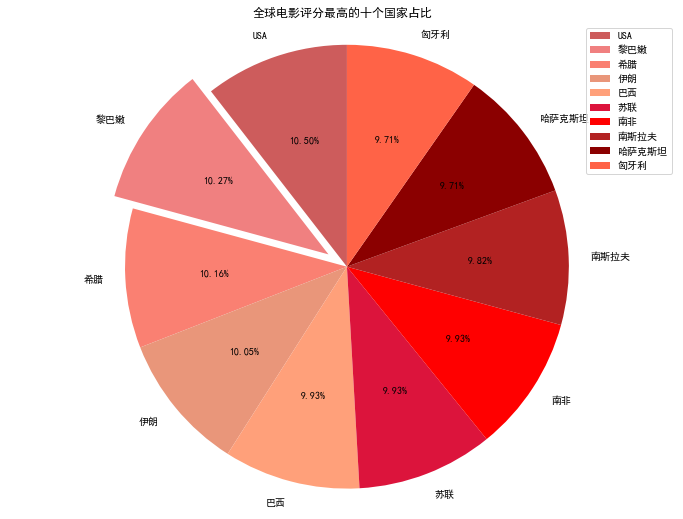

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
data_pair_1 = [(i, float(j)) for i, j in zip(index['coun'], index['score'])]
data_pair_1.sort(key=lambda x:x[1],reverse=True)
data_pair_1 = data_pair_1[0:10]
coun = [c[0] for c in data_pair_1]
score = ['{:.2}'.format(s[1]) for s in data_pair_1]

    
plt.figure(figsize=(12, 9))  # Ë∞ÉËäÇÂõæÂΩ¢Â§ßÂ∞è
labels = coun  # ÂÆö‰πâÊ†áÁ≠æ
sizes = score  # ÊØèÂùóÂÄº
colors = ['IndianRed', 'LightCoral','Salmon', 'DarkSalmon','LightSalmon', 'Crimson','Red', 'FireBrick','DarkRed', 'Tomato',]  # ÊØèÂùóÈ¢úËâ≤ÂÆö‰πâ
explode = (0, 0.1,0,0,0,0,0,0,0,0)  # Â∞ÜÊüê‰∏ÄÂùóÂàÜÂâ≤Âá∫Êù•ÔºåÂÄºË∂äÂ§ßÂàÜÂâ≤Âá∫ÁöÑÈó¥ÈöôË∂äÂ§ß
patches, text1, text2 = plt.pie(sizes,
                                    explode=explode,
                                    labels=labels,
                                    colors=colors,
                                    labeldistance=1.1,  # Âõæ‰æãË∑ùÂúÜÂøÉÂçäÂæÑÂÄçË∑ùÁ¶ª
                                    autopct='%3.2f%%',  # Êï∞ÂÄº‰øùÁïôÂõ∫ÂÆöÂ∞èÊï∞‰Ωç
                                    shadow=False,  # Êó†Èò¥ÂΩ±ËÆæÁΩÆ
                                    startangle=90,  # ÈÄÜÊó∂ÈíàËµ∑ÂßãËßíÂ∫¶ËÆæÁΩÆ
                                    pctdistance=0.6)  # Êï∞ÂÄºË∑ùÂúÜÂøÉÂçäÂæÑÂÄçÊï∞Ë∑ùÁ¶ª
    # patchesÈ•ºÂõæÁöÑËøîÂõûÂÄºÔºåtexts1È•ºÂõæÂ§ñlabelÁöÑÊñáÊú¨Ôºåtexts2È•ºÂõæÂÜÖÈÉ®ÊñáÊú¨
    # xÔºåyËΩ¥ÂàªÂ∫¶ËÆæÁΩÆ‰∏ÄËá¥Ôºå‰øùËØÅÈ•ºÂõæ‰∏∫ÂúÜÂΩ¢
plt.axis('equal')
plt.legend()
plt.title('ÂÖ®ÁêÉÁîµÂΩ±ËØÑÂàÜÊúÄÈ´òÁöÑÂçÅ‰∏™ÂõΩÂÆ∂Âç†ÊØî')
plt.show()


In [130]:
df3.describe()

count    52.000000
mean      8.195643
std       0.492890
min       6.900000
25%       7.930556
50%       8.210000
75%       8.500000
max       9.300000
Name: score, dtype: float64

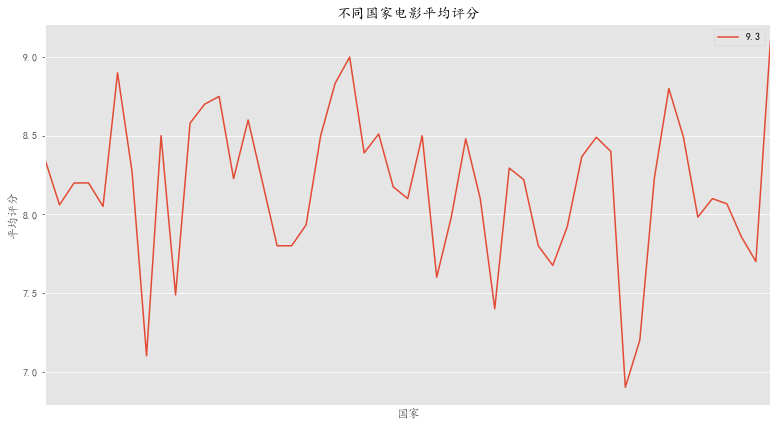

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#ËÆæÁΩÆÁªòÂõæÈ£éÊ†º
plt.style.use('ggplot')
#Â§ÑÁêÜ‰∏≠Êñá‰π±Á†Å
mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
#ÂùêÊ†áËΩ¥Ë¥üÂè∑ÁöÑÂ§ÑÁêÜ
plt.rcParams['axes.unicode_minus']=False

# ËØªÂèñÊï∞ÊçÆ
data = pd.read_csv(r'df3.csv')
names = ['coun','score']
data3 = pd.read_csv(f,names=names)
index = np.arange(len(data3))
# ÁªòÂà∂ÊäòÁ∫øÂõæ
data.plot(kind = 'line',
          style = ['-','--',':']# ËÆæÁΩÆÊäòÁ∫øÂõæÁöÑÁ∫øÊù°Á±ªÂûã
         )
plt.xticks(index)
# ‰øÆÊîπxËΩ¥ÂíåyËΩ¥Ê†áÁ≠æ
plt.xlabel('ÂõΩÂÆ∂')
plt.ylabel('Âπ≥ÂùáËØÑÂàÜ')
# Ê∑ªÂä†ÂõæÂΩ¢Ê†áÈ¢ò
plt.title('‰∏çÂêåÂõΩÂÆ∂ÁîµÂΩ±Âπ≥ÂùáËØÑÂàÜ')
#Ë∞ÉÊï¥ÁîªÂ∏ÉÂ§ßÂ∞è
plt.gcf().set_size_inches((13, 7)) 
# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

In [134]:
#‰∏çÂêå‰∏äÊò†Âπ¥‰ªΩÁöÑÊü±Áä∂Âõæ
from pyecharts.charts import Bar
import pyecharts.options as opts
bar =Bar()
name=list(index['coun'][0:-1])  
value=list(index['score'][0:-1])
bar.add_xaxis(name,)
bar.add_yaxis("‰∏çÂêåÂõΩÂÆ∂Âπ≥ÂùáËØÑÂàÜ",value,color = 'skyblue')
bar.set_global_opts(title_opts=opts.TitleOpts(title="ÂõΩÂÆ∂", subtitle="Âπ≥ÂùáËØÑÂàÜ"),
                    legend_opts=opts.LegendOpts(is_show=True), 
                    xaxis_opts=opts.AxisOpts(name="‰∏çÂêåÂõΩÂÆ∂ËØÑÂàÜ",is_show=True))
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False), #Êï∞Â≠óÈÖçÁΩÆÈ°π
                   markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(name="Ëá™ÂÆö‰πâÁ∫ø",y=8.195643)],  
                   linestyle_opts=opts.LineStyleOpts(width =3,color = 'orange',)   #ÂàÜÂà´Ë°®Á≤óÁªÜÂíåÈ¢úËâ≤     
        ))
bar.render_notebook()   

In [99]:
names = ['country','score']
f = open('data3.csv',encoding='utf_8_sig')
index= pd.read_csv(f,sep=',',header=None)
index.columns = ['country','score']
index.head(1910)

country     score
0                      USA  9.300000
1                       ‰∏≠ÂõΩ  8.400000
2                     ‰∏≠ÂõΩÂè∞Êπæ  8.278788
3        ‰∏≠ÂõΩÂè∞Êπæ/‰∏≠ÂõΩÂ§ßÈôÜ/ÁæéÂõΩ/‰∏≠ÂõΩÈ¶ôÊ∏Ø  8.500000
4                ‰∏≠ÂõΩÂè∞Êπæ/‰∏≠ÂõΩÈ¶ôÊ∏Ø  8.500000
5        ‰∏≠ÂõΩÂè∞Êπæ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/ÁæéÂõΩ/‰∏≠ÂõΩÂ§ßÈôÜ  8.300000
6                  ‰∏≠ÂõΩÂè∞Êπæ/Êó•Êú¨  9.100000
7                  ‰∏≠ÂõΩÂè∞Êπæ/Ê≥ïÂõΩ  8.300000
8                  ‰∏≠ÂõΩÂè∞Êπæ/ÁæéÂõΩ  8.800000
9                     ‰∏≠ÂõΩÂ§ßÈôÜ  8.094483
10               ‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÂè∞Êπæ  7.700000
11               ‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø  8.090000
12          ‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/‰∏≠ÂõΩÂè∞Êπæ  8.600000
13        ‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/Âä†ÊãøÂ§ß/ÁæéÂõΩ  7.600000
14            ‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/Êó•Êú¨  5.500000
15            ‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÈ¶ôÊ∏Ø/Ê≥ïÂõΩ  8.600000
16                 ‰∏≠ÂõΩÂ§ßÈôÜ/Âæ∑ÂõΩ  8.100000
17                 ‰∏≠ÂõΩÂ§ßÈôÜ/Êó•Êú¨  7.500000
18                 ‰∏≠ÂõΩÂ§ßÈôÜ/Ê≥ïÂõΩ  8.200000
19              ‰∏≠ÂõΩÂ§ßÈôÜ/Ê≥ïÂõΩ/Êó•Êú¨  8.000000
20                 ‰∏≠ÂõΩÂ§ßÈôÜ/ÁæéÂõΩ  7.800000
21            ‰∏≠ÂõΩÂ§ßÈôÜ/ÁæéÂõΩ/‰∏≠ÂõΩÈ¶ôÊ∏Ø  6.600000
22                 ‰∏≠ÂõΩÂ§ßÈôÜ/Ëã±ÂõΩ  6.900000
23                    ‰∏≠ÂõΩÈ¶ôÊ∏Ø  8.226316
24               ‰∏≠ÂõΩÈ¶ôÊ∏Ø/‰∏≠ÂõΩÂè∞Êπæ  7.820000
25               ‰∏≠ÂõΩÈ¶ôÊ∏Ø/‰∏≠ÂõΩÂ§ßÈôÜ  8.307692
26          ‰∏≠ÂõΩÈ¶ôÊ∏Ø/‰∏≠ÂõΩÂ§ßÈôÜ/‰∏≠ÂõΩÂè∞Êπæ  8.800000
27                ‰∏≠ÂõΩÈ¶ôÊ∏Ø/Êñ∞Âä†Âù°  7.150000
28              ‰∏≠ÂõΩÈ¶ôÊ∏Ø/Êó•Êú¨/Èü©ÂõΩ  8.900000
29              ‰∏≠ÂõΩÈ¶ôÊ∏Ø/Èü©ÂõΩ/Ê≥∞ÂõΩ  7.400000
..                     ...       ...
243                  Ëã±ÂõΩ/ÁæéÂõΩ  8.317857
244           Ëã±ÂõΩ/ÁæéÂõΩ/ÂåàÁâôÂà©/Á∫¶Êó¶  8.500000
245              Ëã±ÂõΩ/ÁæéÂõΩ/Â¢®Ë•øÂì•  7.900000
246               Ëã±ÂõΩ/ÁæéÂõΩ/Êó•Êú¨  8.400000
247        Ëã±ÂõΩ/ÁæéÂõΩ/ÊØîÂà©Êó∂/‰∏πÈ∫¶/Âæ∑ÂõΩ  8.300000
248               Ëã±ÂõΩ/ÁæéÂõΩ/Ê≥ïÂõΩ  8.600000
249          Ëã±ÂõΩ/ÁæéÂõΩ/Áà±Â∞îÂÖ∞/Âç¢Ê£ÆÂ†°  8.100000
250                    Ë•øÁè≠Áâô  8.020000
251                Ë•øÁè≠Áâô/Â¢®Ë•øÂì•  7.400000
252                 Ë•øÁè≠Áâô/ÁæéÂõΩ  7.500000
253             Ë•øÁè≠Áâô/ÁæéÂõΩ/ÊÑèÂ§ßÂà©  7.200000
254              Ë•øÁè≠Áâô/ÁæéÂõΩ/Ê≥ïÂõΩ  8.300000
255                 Ë•øÁè≠Áâô/Ëã±ÂõΩ  8.700000
256             Ë•øÁè≠Áâô/Ëã±ÂõΩ/ÊÑèÂ§ßÂà©  8.500000
257           Ë•øÁè≠Áâô/Ëã±ÂõΩ/ÁæéÂõΩ/Ê≥ïÂõΩ  7.900000
258                     Ë∂äÂçó  8.100000
259                    ÈòøÊ†πÂª∑  7.200000
260                 ÈòøÊ†πÂª∑/Ê≥ïÂõΩ  8.500000
261                ÈòøÊ†πÂª∑/Ë•øÁè≠Áâô  8.500000
262                     Èü©ÂõΩ  7.851485
263             Èü©ÂõΩ/‰∏≠ÂõΩÂ§ßÈôÜ/Ê≥ïÂõΩ  8.100000
264                Èü©ÂõΩ/‰∏≠ÂõΩÈ¶ôÊ∏Ø  8.100000
265                  Èü©ÂõΩ/Âæ∑ÂõΩ  8.500000
266                  Èü©ÂõΩ/Êç∑ÂÖã  7.500000
267                  Èü©ÂõΩ/Êó•Êú¨  8.100000
268             Èü©ÂõΩ/Êó•Êú¨/‰∏≠ÂõΩÈ¶ôÊ∏Ø  7.900000
269                  Èü©ÂõΩ/Ê≥ïÂõΩ  7.900000
270             Èü©ÂõΩ/ÁæéÂõΩ/‰∏≠ÂõΩÈ¶ôÊ∏Ø  7.750000
271                   È©¨Êù•Ë•ø‰∫ö  7.700000
272  ÈªéÂ∑¥Â´©/ÁæéÂõΩ/Ê≥ïÂõΩ/Â°ûÊµ¶Ë∑ØÊñØ/Âç°Â°îÂ∞î/Ëã±ÂõΩ  9.100000

[273 rows x 2 columns]

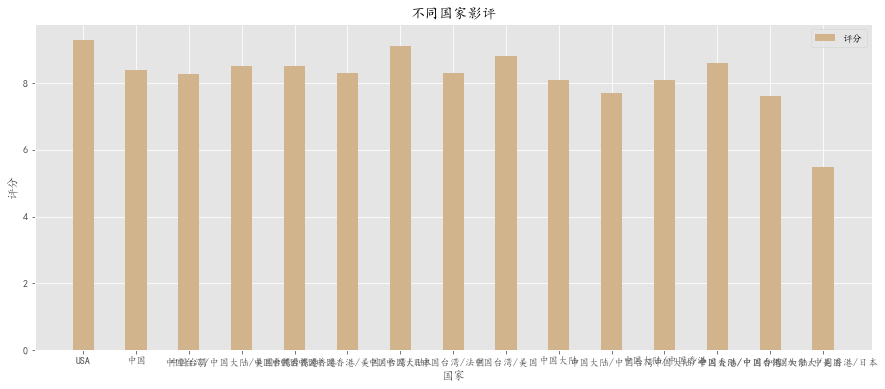

In [111]:
#Ê®™ÂêëÊü±Áä∂Âõæ
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # Ê±âÂ≠óÂ≠ó‰Ωì,‰ºòÂÖà‰ΩøÁî®Ê•∑‰ΩìÔºåÂ¶ÇÊûúÊâæ‰∏çÂà∞Ê•∑‰ΩìÔºåÂàô‰ΩøÁî®Èªë‰Ωì
mpl.rcParams['font.size'] = 10  # Â≠ó‰ΩìÂ§ßÂ∞è
mpl.rcParams['axes.unicode_minus'] = False  # Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑


names = ['country','score']
f = open('data3.csv',encoding='utf_8')
data = pd.read_csv(f,names=names)
data2 = data['score'].groupby(data['country']).mean().head(15)

index = np.arange(len(data2))
plt.figure(figsize=(15,6))
plt.bar(index, data2, width=0.4, color='tan',label = 'ËØÑÂàÜ')
plt.grid(True)
plt.legend(loc=0)

plt.axis('tight')
plt.xlabel('ÂõΩÂÆ∂')
plt.ylabel('ËØÑÂàÜ')
plt.xticks(index, tuple(data2.index.tolist()[:15])) 
plt.title('‰∏çÂêåÂõΩÂÆ∂ÂΩ±ËØÑ')
plt.show()

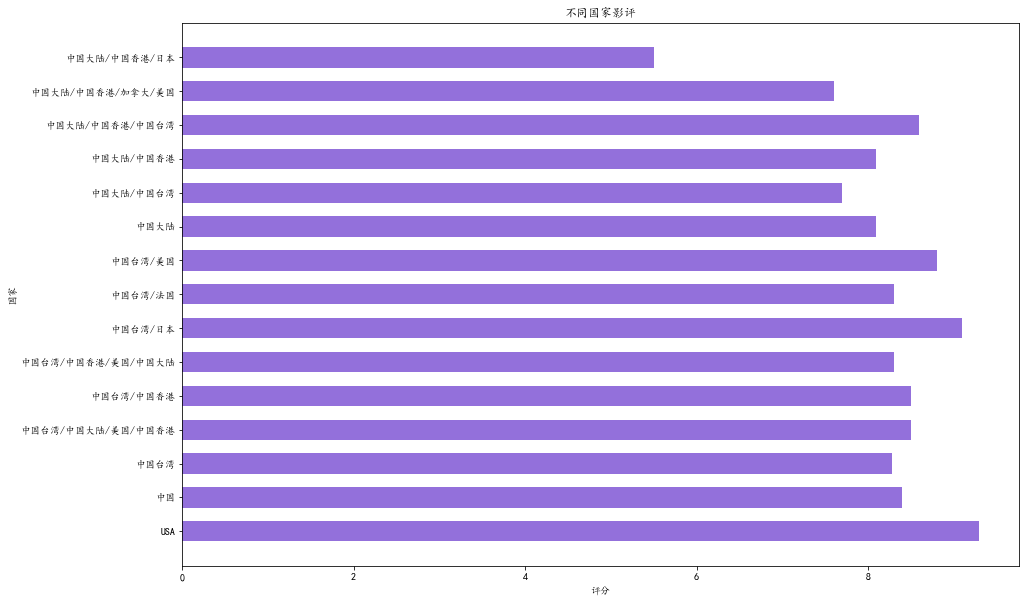

In [5]:
#Á∫µÂêëÊü±Áä∂Âõæ
plt.figure(figsize=(15, 10))
plt.barh(bottom=index, width=data2, label='', color='mediumpurple', alpha=1.0, height=0.6)
plt.yticks(index, tuple(data2.index.tolist()[:15]))
plt.ylabel('ÂõΩÂÆ∂')
plt.xlabel('ËØÑÂàÜ')
plt.title('‰∏çÂêåÂõΩÂÆ∂ÂΩ±ËØÑ')
plt.show()

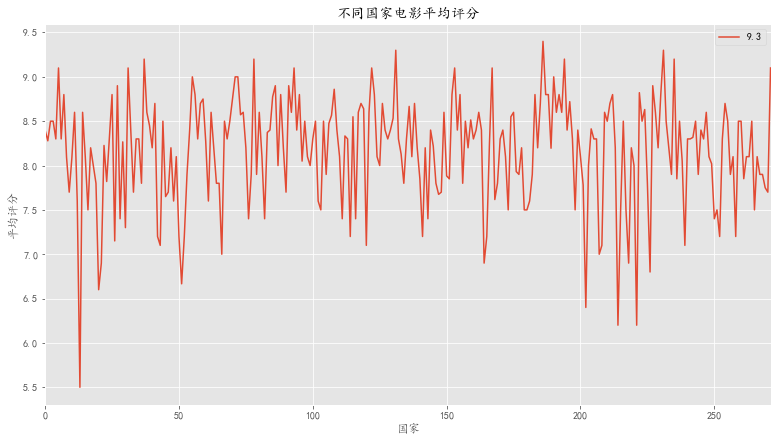

In [10]:
#‰∏çÂêåÂõΩÂÆ∂Âπ≥ÂùáËØÑÂàÜÊäòÁ∫øÂõæ
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#ËÆæÁΩÆÁªòÂõæÈ£éÊ†º
plt.style.use('ggplot')
#Â§ÑÁêÜ‰∏≠Êñá‰π±Á†Å
mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
#ÂùêÊ†áËΩ¥Ë¥üÂè∑ÁöÑÂ§ÑÁêÜ
plt.rcParams['axes.unicode_minus']=False

# ËØªÂèñÊï∞ÊçÆ
data = pd.read_csv(r'data3.csv')
# ÁªòÂà∂ÊäòÁ∫øÂõæ
data.plot(kind = 'line',
          style = ['-','--',':']# ËÆæÁΩÆÊäòÁ∫øÂõæÁöÑÁ∫øÊù°Á±ªÂûã
         )
# ‰øÆÊîπxËΩ¥ÂíåyËΩ¥Ê†áÁ≠æ
plt.xlabel('ÂõΩÂÆ∂')
plt.ylabel('Âπ≥ÂùáËØÑÂàÜ')
# Ê∑ªÂä†ÂõæÂΩ¢Ê†áÈ¢ò
plt.title('‰∏çÂêåÂõΩÂÆ∂ÁîµÂΩ±Âπ≥ÂùáËØÑÂàÜ')
#Ë∞ÉÊï¥ÁîªÂ∏ÉÂ§ßÂ∞è
plt.gcf().set_size_inches((13, 7)) 
# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()


In [93]:
time_score = df.iloc[:,2:4]
print(time_score) #ÊèêÂèñÂú∞Âå∫ÂíåËØÑÂàÜÔºåÊâÄÊúâË°åÔºå2-3Âàó
np.mean(time_score)

      8.8            2020-12-25(‰∏≠ÂõΩÂ§ßÈôÜ/ÁæéÂõΩÁΩëÁªú)/2020-10-11(‰º¶Êï¶ÁîµÂΩ±ËäÇ)
0     9.2                                     2020-10-17(Êó•Êú¨)
1     8.6                    2020-09-25(ÁæéÂõΩ)/2020-10-16(ÁæéÂõΩÁΩëÁªú)
2     8.0                                   2021-02-12(‰∏≠ÂõΩÂ§ßÈôÜ)
3     8.3                  2021-05-03(‰∏≠ÂõΩÂ§ßÈôÜÁΩëÁªú)/2021-03-18(ÁæéÂõΩ)
4     8.3  2020-09-11(Â®ÅÂ∞ºÊñØÁîµÂΩ±ËäÇ)/2021-01-29(ÁæéÂõΩ)/2021-02-19(Áæé...
5     8.5                                     2021-03-31(Èü©ÂõΩ)
6     8.1                                     2020-10-16(Êó•Êú¨)
7     8.6                                     2020-07-17(Êó•Êú¨)
8     7.9                    2020-11-27(‰∏≠ÂõΩÂ§ßÈôÜ)/2020-11-25(ÁæéÂõΩ)
9     7.9                                     2021-03-26(ÁæéÂõΩ)
10    8.6                                     2020-09-11(Êó•Êú¨)
11    8.3                                     2020-10-02(Êó•Êú¨)
12    8.5                                     2020-08-15(Êó•Êú¨)
13    7.7     2020-09-

8.8    8.24109
dtype: float64

In [95]:
import pandas as pd
#from numpy import*
names = ['name','country','score','time_detail']
f = open('D:/python/Ë±ÜÁì£ÁîµÂΩ±/mov.csv',encoding='utf-8')
data = pd.read_csv(f,names=names)
data['year'] = data.apply(lambda x: x.time_detail[0:4], axis=1)
#print(data.head())
data2 = data.groupby('year')['score'].mean()
print(data2)
data2.to_csv('data2.csv')

year
1913    9.100000
1919    8.900000
1920    8.900000
1921    8.800000
1922    8.450000
1924    9.050000
1925    9.050000
1926    8.800000
1927    8.700000
1928    8.900000
1930    8.700000
1931    8.300000
1932    7.900000
1934    8.900000
1936    9.300000
1937    8.400000
1939    9.300000
1940    8.700000
1941    8.700000
1942    8.850000
1943    8.550000
1944    8.500000
1945    8.500000
1946    9.300000
1948    8.566667
1949    8.700000
1950    8.600000
1951    8.633333
1952    8.700000
1953    8.933333
          ...   
1993    8.772222
1994    8.760000
1995    8.608333
1996    8.336364
1997    8.522857
1998    8.413636
1999    8.544444
2000    8.416667
2001    8.428125
2002    8.321622
2003    8.461364
2004    8.432653
2005    8.174359
2006    8.286667
2007    8.337500
2008    8.424324
2009    8.308163
2010    8.435556
2011    8.406818
2012    8.244681
2013    8.397333
2014    8.243396
2015    8.225352
2016    8.120313
2017    8.189063
2018    8.083824
2019    7.981301
2020    7

In [119]:
names = ['year','score']
f = open('data2.csv')
index= pd.read_csv(f,sep=',',header=None)
index.columns = ['year','score']
index.head(1910)

year        score
0   year        score
1   1913          9.1
2   1919          8.9
3   1920          8.9
4   1921          8.8
..   ...          ...
95  2018  8.083823529
96  2019  7.981300813
97  2020  7.424064171
98  2021       7.2125
99  May-          8.5

[100 rows x 2 columns]

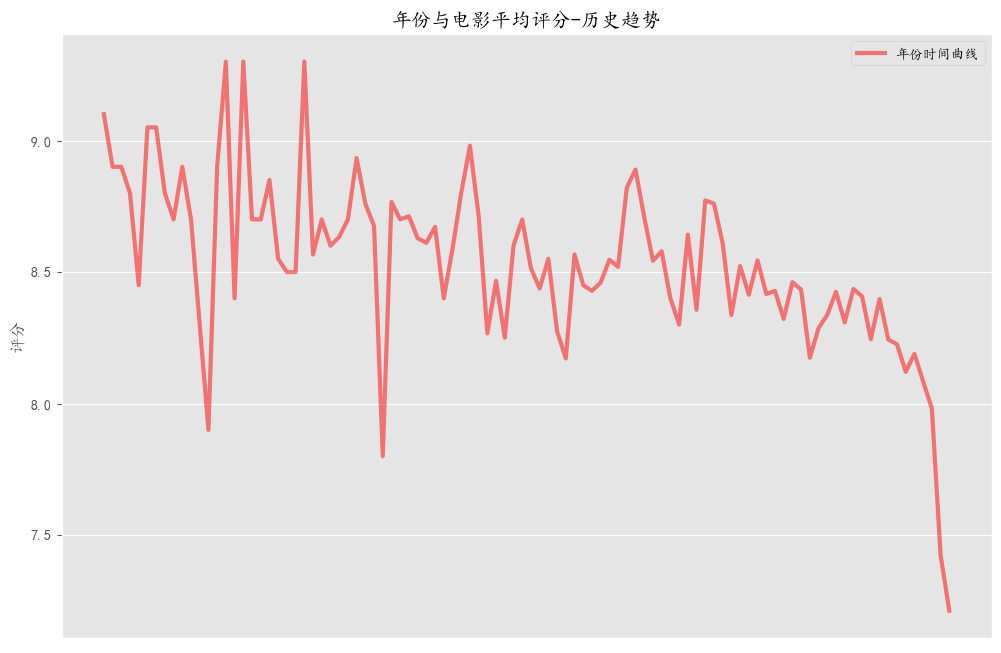

In [120]:
#‰∏çÂêåÂõΩÂÆ∂Âπ≥ÂùáËØÑÂàÜÊäòÁ∫øÂõæ
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#ËÆæÁΩÆÁªòÂõæÈ£éÊ†º
plt.style.use('ggplot')
#Â§ÑÁêÜ‰∏≠Êñá‰π±Á†Å
mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
#ÂùêÊ†áËΩ¥Ë¥üÂè∑ÁöÑÂ§ÑÁêÜ
plt.rcParams['axes.unicode_minus']=False
# ËØªÂèñÊï∞ÊçÆ
data = index.head(1910)
year = [y for y in data['year']]
del year[0]
del year[-1]
score = [s for s in data['score']]
del score[0]
del score[-1]
score_1 = [float(s) for s in score]
plt.figure(figsize=(12,8),dpi=100)
plt.xticks(rotation=45)
#Êõ≤Á∫øÁöÑÂáΩÊï∞
plt.plot(year,score_1,color= 'red',alpha = 0.5,linewidth=3,label='Âπ¥‰ªΩÊó∂Èó¥Êõ≤Á∫ø')
plt.ylabel('ËØÑÂàÜ')
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.legend()
plt.title('Âπ¥‰ªΩ‰∏éÁîµÂΩ±Âπ≥ÂùáËØÑÂàÜ-ÂéÜÂè≤Ë∂ãÂäø')
plt.show()

In [155]:
data = index.head(1910)
year = [y for y in data['year']]
del year[0]
del year[-1]
score = [s for s in data['score']]
del score[0]
del score[-1]
score_1 = [float(s) for s in score]
year_1 = [int(y) for y in year]
length = 0
sum_ = 0
for i in range(len(year)):
    if int(year[i]) <= 1950: 
        sum_ += float(score_1[i])
        length += 1
avg1 = sum_ / length    
for i in range(len(year)):  
    if int(year[i]) >= 1950 and int(year[i]) <= 1980  : 
        sum_ += float(score_1[i])
        length += 1
avg2 = sum_ / length
for i in range(len(year)):
    if int(year[i]) >= 1980 and int(year[i]) <= 2010  : 
        sum_ += float(score_1[i])
        length += 1
avg3 = sum_ / length
for i in range(len(year)):
    if int(year[i]) >= 2010 and int(year[i]) <= 2021  : 
        sum_ += float(score_1[i])
        length += 1
avg4 = sum_ / length


8.75617283951852 8.65115831965517 8.594908700460671 8.533773011039601


In [165]:
from pyecharts import options as opts
from pyecharts.charts import Radar
from pyecharts.globals import ThemeType
v1 = [[8.76, 8.65, 8.60, 8.53]]
c = (
    Radar(init_opts=opts.InitOpts(theme=ThemeType.MACARONS))
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="1910-1950Âπ¥", max_=10.00),
            opts.RadarIndicatorItem(name="1950-1980Âπ¥", max_=10.00),
            opts.RadarIndicatorItem(name="1980-2010Âπ¥", max_=10.00),
            opts.RadarIndicatorItem(name="2010-2021Âπ¥", max_=10.00),

        ]
    )
    .add("ËØÑÂàÜ", v1,label_opts=opts.LabelOpts(is_show=True),)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
    .set_global_opts(
        legend_opts=opts.LegendOpts(selected_mode="single"),
        title_opts=opts.TitleOpts(title="Âπ¥‰ª£‰∏éËØÑÂàÜ"),
    )
)
c.render_notebook()

In [121]:
#‰∏çÂêå‰∏äÊò†Âπ¥‰ªΩÁöÑÊü±Áä∂Âõæ
from pyecharts.charts import Bar
import pyecharts.options as opts
bar =Bar()
name=list(index['year'][0:-1])  
value=list(index['score'][0:-1])
bar.add_xaxis(name,)
bar.add_yaxis("‰∏äÊò†Êó∂Èó¥Âπ≥ÂùáËØÑÂàÜ",value,color = 'thistle')
bar.set_global_opts(title_opts=opts.TitleOpts(title="‰∏äÊò†Êó∂Èó¥", subtitle="Âπ≥ÂùáËØÑÂàÜ"),
                    legend_opts=opts.LegendOpts(is_show=True), 
                    xaxis_opts=opts.AxisOpts(name="‰∏äÊò†Êó∂Èó¥ËØÑÂàÜ",is_show=True))
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False), #Êï∞Â≠óÈÖçÁΩÆÈ°π
                   markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(name="Ëá™ÂÆö‰πâÁ∫ø",y=7.5)], 
                   linestyle_opts=opts.LineStyleOpts(width =3,color = 'khaki',)   #ÂàÜÂà´Ë°®Á≤óÁªÜÂíåÈ¢úËâ≤     
        ))
bar.render_notebook()  

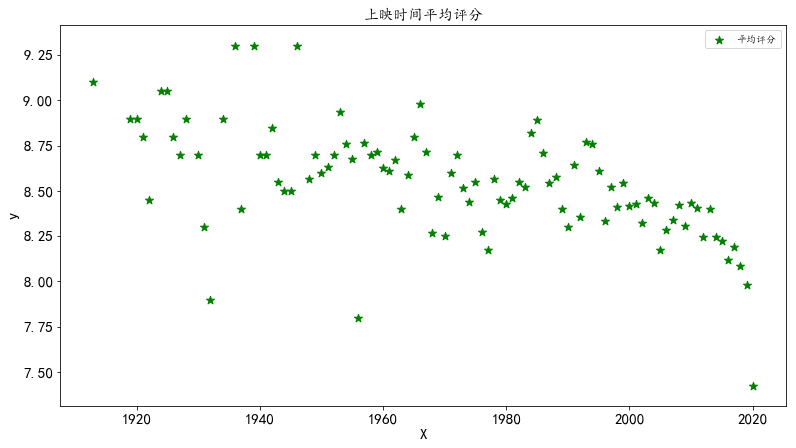

In [19]:
#Êï£ÁÇπÂõæË°®Á§∫
import pandas as pd
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # Ê±âÂ≠óÂ≠ó‰Ωì,‰ºòÂÖà‰ΩøÁî®Ê•∑‰ΩìÔºåÂ¶ÇÊûúÊâæ‰∏çÂà∞Ê•∑‰ΩìÔºåÂàô‰ΩøÁî®Èªë‰Ωì
mpl.rcParams['font.size'] = 10  # Â≠ó‰ΩìÂ§ßÂ∞è
mpl.rcParams['axes.unicode_minus'] = False  # Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑

f = open('data2.csv')
index= pd.read_csv(f,sep=',',header=None)
index.columns = ['year','score']
plt.scatter(index['year'][0:-2], index['score'][0:-2],marker='*',s=72,c='green') # ÁîªÊï£ÁÇπÂõæ  marker ÁÇπÁöÑÊ†∑Âºè  c È¢úËâ≤  s Êï£ÁÇπÁöÑÂ§ßÂ∞è ÈªòËÆ§ÊòØ 36
plt.title('‰∏äÊò†Êó∂Èó¥Âπ≥ÂùáËØÑÂàÜ',fontsize=15)
# ËÆæÁΩÆ x y ËΩ¥Ê†áÁ≠æ
plt.xlabel('X',fontsize=15)
plt.ylabel('y',fontsize=15)
# ËÆæÁΩÆxyËΩ¥ÂàªÂ∫¶Â≠ó‰ΩìÂ§ßÂ∞è
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# ËÆæÁΩÆÊï£ÁÇπÂõæ Âõæ‰æã  Âõæ‰æãÂ≠ó‰ΩìÂ§ßÂ∞è ‰ΩçÁΩÆ  0 Ë°®Á§∫ÊúÄ‰Ω≥‰ΩçÁΩÆ
plt.legend(['Âπ≥ÂùáËØÑÂàÜ'],fontsize=10,loc=0)
plt.gcf().set_size_inches((13, 7))  #Ë∞ÉÊï¥ÁîªÂ∏ÉÂ§ßÂ∞è
plt.show()

In [1]:
#ÂÖ∂‰ªñÂÜÖÂÆπ
import re
import requests
import json
from lxml import etree
import time
import os

def get_page(url):
    #ÂÆö‰πâËØ∑Ê±ÇÂ§¥
    try:
        headers={
            'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'

        }
        #ÂèëËµ∑ËØ∑Ê±Ç
        res=requests.get(url=url,headers=headers)
        #Âà§Êñ≠ËØ∑Ê±ÇÊòØÂê¶ÊàêÂäü
        if res.status_code==200:
            print("ËØ∑Ê±ÇÊàêÂäüÔºÅ")
            response=res.content.decode("utf-8")
            return response
    except:
        return None


def parse_data(html):
    #‰ΩøÁî®xpathËøõË°åÊï∞ÊçÆËß£Êûê
    html=etree.HTML(html)
    title_data=html.xpath('//div[@class="hd"]//a//span[1]//text()')
    estimate_score=html.xpath('//div[@class="star"]//span[2]//text()')
    paming_data=html.xpath('//div[@class="item"]//div//em//text()')
    image=html.xpath('//div[@class="pic"]//a//img/@src')
    infor_data=html.xpath('//p[@class=""]//text()')
    datalist=list(zip(title_data,estimate_score,paming_data,image,infor_data))
    datamore=[{"ÁîµÂΩ±ÂêçÁß∞":i[0],"ËØÑÂàÜ":i[1],"ÊéíÂêç":i[2],"ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ":i[3],"ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ":i[4]} for i in datalist]
    for a in datamore:
        print(a)
        with open("D:/python/Ë±ÜÁì£ÁîµÂΩ±/Ë±ÜÁì£250.txt", 'a+', encoding='utf-8') as f:
             f.write(json.dumps(a,ensure_ascii=False))
             f.write("\n")
    
def download_image(html):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'

    }
    html=etree.HTML(html)
    urls =html.xpath('//div[@class="pic"]//a//img/@src')
    for url in urls:  # ÊãøÂà∞ÊØèÂº†ÂõæÁâáÁöÑ‰∏ãËΩΩÂú∞ÂùÄ
        time.sleep(1)  # ÈÅøÂÖçÂ§ßËßÑÊ®°ËÆøÈóÆ   ÂØºËá¥ÁΩëÁ´ôÂ¥©
        file_name = url.split("/")[-1]  # ÂõæÁâáÁöÑÂêçÂ≠óÂèØ‰ª•‰ΩøÁî®split('/')[-1]
        response = requests.get(url, headers=headers)  # ËØ∑Ê±ÇÂõæÁâá
        dir_name='D:/python/Ë±ÜÁì£ÁîµÂΩ±/ÁîµÂΩ±Êµ∑Êä•'
        if not os.path.exists(dir_name):
            os.mkdir(dir_name) #ÂàõÂª∫‰∏ÄÁ∫ßÁõÆÂΩï
        with open(dir_name + "/" + file_name, "wb") as f:  # Âä†/ÊòØ‰∏∫‰∫Ü‰ΩìÁé∞ÁõÆÂΩïÁöÑÊõøÊç¢
            f.write(response.content)
def main(num):
    #ÂÆö‰πâurl
    url=f'https://movie.douban.com/top250?start={num}'
    #Ë∞ÉÁî®ËØ∑Ê±ÇÂáΩÊï∞
    html=get_page(url)
    if html:
        #Ë∞ÉÁî®Ëß£ÊûêÂáΩÊï∞ÔºåÂíå‰∏ãËΩΩÂáΩÊï∞
        parse_data(html)
        download_image(html)

if __name__=="__main__":
    for i in range(10):
        print(f"Ê≠£Âú®Áà¨ÂèñÁ¨¨{i}È°µÊï∞ÊçÆ")
        main(i*25)
        time.sleep(2)


Ê≠£Âú®Áà¨ÂèñÁ¨¨0È°µÊï∞ÊçÆ
ËØ∑Ê±ÇÊàêÂäüÔºÅ
{'ÁîµÂΩ±ÂêçÁß∞': 'ËÇñÁî≥ÂÖãÁöÑÊïëËµé', 'ËØÑÂàÜ': '9.7', 'ÊéíÂêç': '1', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p480747492.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: ÂºóÂÖ∞ÂÖã¬∑Âæ∑ÊãâÈÇ¶Áâπ Frank Darabont\xa0\xa0\xa0‰∏ªÊºî: ËíÇÂßÜ¬∑ÁΩóÂÆæÊñØ Tim Robbins /...'}
{'ÁîµÂΩ±ÂêçÁß∞': 'Èú∏ÁéãÂà´Âß¨', 'ËØÑÂàÜ': '9.6', 'ÊéíÂêç': '2', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2561716440.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            1994\xa0/\xa0ÁæéÂõΩ\xa0/\xa0ÁäØÁΩ™ ÂâßÊÉÖ\n                        '}
{'ÁîµÂΩ±ÂêçÁß∞': 'ÈòøÁîòÊ≠£‰º†', 'ËØÑÂàÜ': '9.5', 'ÊéíÂêç': '3', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2372307693.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: ÈôàÂáØÊ≠å Kaige Chen\xa0\xa0\xa0‰∏ªÊºî: Âº†ÂõΩËç£ Leslie Cheung / Âº†‰∏∞ÊØÖ Fengyi Zha...'}
{'ÁîµÂΩ±ÂêçÁß∞': 'Ëøô‰∏™Êù

Ê≠£Âú®Áà¨ÂèñÁ¨¨2È°µÊï∞ÊçÆ
ËØ∑Ê±ÇÊàêÂäüÔºÅ
{'ÁîµÂΩ±ÂêçÁß∞': 'ÊåáÁéØÁéã1ÔºöÊä§Êàí‰ΩøËÄÖ', 'ËØÑÂàÜ': '9.1', 'ÊéíÂêç': '51', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2640234840.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: ÂΩºÂæó¬∑Êù∞ÂÖãÈÄä Peter Jackson\xa0\xa0\xa0‰∏ªÊºî: ‰ºäÂà©‰∫ö¬∑‰ºçÂæ∑ Elijah Wood / Ë•øÊÅ©...'}
{'ÁîµÂΩ±ÂêçÁß∞': 'Â§ßÈóπÂ§©ÂÆ´', 'ËØÑÂàÜ': '9.4', 'ÊéíÂêç': '52', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2184505167.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            2001\xa0/\xa0Êñ∞Ë•øÂÖ∞ ÁæéÂõΩ\xa0/\xa0ÂâßÊÉÖ Âä®‰Ωú Â•áÂπª ÂÜíÈô©\n                        '}
{'ÁîµÂΩ±ÂêçÁß∞': 'Èí¢Áê¥ÂÆ∂', 'ËØÑÂàÜ': '9.2', 'ÊéíÂêç': '53', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p792376093.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: ‰∏áÁ±ÅÈ∏£ Laiming Wan / ÂîêÊæÑ Cheng  Tang\xa0\xa0\xa0‰∏ªÊºî: ÈÇ±Â≤≥Â≥∞ Yuefeng Qiu /..

Ê≠£Âú®Áà¨ÂèñÁ¨¨4È°µÊï∞ÊçÆ
ËØ∑Ê±ÇÊàêÂäüÔºÅ
{'ÁîµÂΩ±ÂêçÁß∞': 'Â§©‰ΩøÁà±Áæé‰∏Ω', 'ËØÑÂàÜ': '8.7', 'ÊéíÂêç': '101', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2447590313.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: ËÆ©-ÁöÆÂüÉÂ∞î¬∑ÁÉ≠ÂÜÖ Jean-Pierre Jeunet\xa0\xa0\xa0‰∏ªÊºî: Â••Èªõ‰∏Ω¬∑Â°îÂõæ Audrey Tau...'}
{'ÁîµÂΩ±ÂêçÁß∞': 'ÂπΩÁÅµÂÖ¨‰∏ª', 'ËØÑÂàÜ': '8.9', 'ÊéíÂêç': '102', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img9.doubanio.com/view/photo/s_ratio_poster/public/p1613191025.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            2001\xa0/\xa0Ê≥ïÂõΩ Âæ∑ÂõΩ\xa0/\xa0ÂâßÊÉÖ ÂñúÂâß Áà±ÊÉÖ\n                        '}
{'ÁîµÂΩ±ÂêçÁß∞': 'Â∞èÊ£ÆÊûó Â§èÁßãÁØá', 'ËØÑÂàÜ': '9.0', 'ÊéíÂêç': '103', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2564498893.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: ÂÆ´Â¥éÈ™è Hayao Miyazaki\xa0\xa0\xa0‰∏ªÊºî: ÊùæÁî∞Ê¥ãÊ≤ª Y√¥ji Matsuda / Áü≥Áî∞ÁôæÂêà...'}
{'Á

Ê≠£Âú®Áà¨ÂèñÁ¨¨6È°µÊï∞ÊçÆ
ËØ∑Ê±ÇÊàêÂäüÔºÅ
{'ÁîµÂΩ±ÂêçÁß∞': 'Êú™È∫ªÁöÑÈÉ®Â±ã', 'ËØÑÂàÜ': '9.0', 'ÊéíÂêç': '151', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p1351050722.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: ‰ªäÊïè Satoshi Kon\xa0\xa0\xa0‰∏ªÊºî: Â≤©Áî∑Ê∂¶Â≠ê Junko Iwao / ÊùæÊú¨Ê¢®È¶ô Rica Matsu...'}
{'ÁîµÂΩ±ÂêçÁß∞': 'ÁîµÈîØÊÉäÈ≠Ç', 'ËØÑÂàÜ': '8.7', 'ÊéíÂêç': '152', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2565332644.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            1997\xa0/\xa0Êó•Êú¨\xa0/\xa0Âä®Áîª Â•áÂπª ÊÉäÊÇö\n                        '}
{'ÁîµÂΩ±ÂêçÁß∞': 'ÊàëÊòØÂ±±ÂßÜ', 'ËØÑÂàÜ': '9.0', 'ÊéíÂêç': '153', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img9.doubanio.com/view/photo/s_ratio_poster/public/p652417775.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: Ë©πÂßÜÊñØ¬∑Ê∏© James Wan\xa0\xa0\xa0‰∏ªÊºî: Èõ∑¬∑Ê≤ÉÁ∫≥Â∞î Leigh Whannell / Âä†Âà©¬∑Ëâæ...'}
{'ÁîµÂΩ±ÂêçÁß∞': 

Ê≠£Âú®Áà¨ÂèñÁ¨¨8È°µÊï∞ÊçÆ
ËØ∑Ê±ÇÊàêÂäüÔºÅ
{'ÁîµÂΩ±ÂêçÁß∞': 'Êµ∑ËæπÁöÑÊõºÂΩªÊñØÁâπ', 'ËØÑÂàÜ': '8.6', 'ÊéíÂêç': '201', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2421855655.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: ËÇØÂ∞ºÊñØ¬∑ÁΩóÁ∫≥Ê†π Kenneth Lonergan\xa0\xa0\xa0‰∏ªÊºî: Âç°Ë•ø¬∑ÈòøÂºóËé±ÂÖã Casey Affle...'}
{'ÁîµÂΩ±ÂêçÁß∞': '2001Â§™Á©∫Êº´Ê∏∏', 'ËØÑÂàÜ': '8.8', 'ÊéíÂêç': '202', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2560717825.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            2016\xa0/\xa0ÁæéÂõΩ\xa0/\xa0ÂâßÊÉÖ ÂÆ∂Â∫≠\n                        '}
{'ÁîµÂΩ±ÂêçÁß∞': '‰∫∫Â∑•Êô∫ËÉΩ', 'ËØÑÂàÜ': '8.7', 'ÊéíÂêç': '203', 'ÁîµÂΩ±Êµ∑Êä•Âú∞ÂùÄ': 'https://img1.doubanio.com/view/photo/s_ratio_poster/public/p792257137.jpg', 'ÁîµÂΩ±ÁÆÄ‰ªã‰ø°ÊÅØ': '\n                            ÂØºÊºî: ÊñØÂù¶Âà©¬∑Â∫ìÂ∏ÉÈáåÂÖã Stanley Kubrick\xa0\xa0\xa0‰∏ªÊºî: ÂáØÂ∞î¬∑ÊùúÊãâ Keir Dullea / ...'}
{'ÁîµÂΩ±Âêç

In [3]:
import requests
#pip install bs4
from bs4 import BeautifulSoup
from lxml import etree
#ÂèçÁà¨
headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"
}
res = requests.get("https://movie.douban.com/subject/34841067/comments?status=P",headers=headers)
print(res.text)
#ÂìçÂ∫îÊï∞ÊçÆÂàùÂßãÂåñ
res = BeautifulSoup(res.text,"lxml")
comments = res.find("div",id="comments")
p_list = comments.find_all("p") #Â±ÇÂ±ÇÂ§ÑÁêÜÔºåÊâæÂà∞ÊâÄÊúâdiv_list
data_list = []
for i in p_list:
    data_list.append(i.find("span").string) #ÊâæÁöÑÊòØÊñáÊú¨‰ø°ÊÅØ
    
#ËØ∑Ê±Ç‚Äî‚ÄîÂ§ÑÁêÜÂìçÂ∫î‚Äî‚ÄîÊñáÊú¨Â§ÑÁêÜ

with open("yingping.txt","w",encoding='utf-8')as f:
    for i in data_list:
        f.write(i+"\n")
  

<!DOCTYPE html>
<html lang="zh-CN" class="ua-windows ua-ff88">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <title>

‰Ω†Â•ΩÔºåÊùéÁÑïËã± Áü≠ËØÑ
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
    <meta name="keywords" content="‰Ω†Â•ΩÔºåÊùéÁÑïËã±,ÂΩ±ËÆØ,ÊéíÁâá,ÊîæÊò†Êó∂Èó¥,ÁîµÂΩ±Á•®‰ª∑,Âú®Á∫øË¥≠Á•®"/>
    <meta name="description" content="‰Ω†Â•ΩÔºåÊùéÁÑïËã±Áü≠ËØÑ" />
    <meta name="mobile-agent" content="format=html5; url=https://m.douban.com/movie/subject/34841067/comments"/>
    <script type="text/javascript" src="https://img3.doubanio.com/f/shire/2c0c1c6b83f9a457b0f38c38a32fc43a42ec9bad/js/do.js" data-c

In [4]:
from pyecharts.charts import WordCloud
import jieba
from collections import Counter
path= "D:/python/Ë±ÜÁì£ÁîµÂΩ±/" 
with open (path+"yingping.txt", 'r', encoding= 'gbk' ,errors="ignore") as file:
    data1=file.read()
print(len(data1))

18611


In [ ]:
#ÊùéÁÑïËã±ËØç‰∫ëÂõæ
from wordcloud import WordCloud
import jieba
#1.Â∞ÜÂ≠óÁ¨¶‰∏≤ÂàáÂàÜ‰∏∫Âçï‰∏™Â≠óÁ¨¶
def chinese_jieba(text):
    wordlist_jieba=jieba.cut(text)
    space_wordlist=''.join(wordlist_jieba)
    return  space_wordlist
with open("yingping.txt" ,encoding="utf-8")as file:
    text=file.read()
    text=chinese_jieba(text)
    wordcloud = WordCloud(font_path="C:/Windows/Fonts/simfang.ttf",
                          background_color="white", width=600,
                          height=400, max_words=200,min_font_size=8).generate(text)
    image=wordcloud.to_image()
    image.show()



In [ ]:
from wordcloud import WordCloud
import jieba
import numpy
import PIL.Image as Image
import matplotlib.pyplot as plt
#1.Â∞ÜÂ≠óÁ¨¶‰∏≤ÂàáÂàÜ
def chinese_jieba(text):
    wordlist_jieba=jieba.cut(text)
    space_wordlist=" ".join(wordlist_jieba)
    return space_wordlist
with open("yingping.txt" ,encoding="utf-8")as file:
    text=file.read()
    text=chinese_jieba(text)
    #2.ÂõæÁâáÈÅÆÁΩ©Â±Ç
    mask_pic=numpy.array(Image.open("heart.jpg"))
    #3.Â∞ÜÂèÇÊï∞maskËÆæÂÄº‰∏∫Ôºömask_pic
    wordcloud = WordCloud(font_path="C:/Windows/Fonts/simfang.ttf",mask=mask_pic,background_color="white", width=600,
                          height=600, max_words=300,min_font_size=10).generate(text)
    image=wordcloud.to_image()
    image.show()

